Making a perceptron from scratch

In [50]:
import d2l
from mxnet import gluon, np, npx
npx.set_np()

In [51]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [52]:
num_inputs, num_hiddens, num_outputs = (28*28), 256, 10

W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hiddens))
b1 = np.zeros(num_hiddens)

W2 = np.random.normal(scale=0.01, size=(num_hiddens, num_outputs))
b2 = np.zeros(num_outputs)

params = [W1,b1,W2,b2]

for param in params:
    param.attach_grad()
    
def relu(X):
    return np.maximum(0,X)

loss = gluon.loss.SoftmaxCrossEntropyLoss()

def net(X):
    X = X.reshape(-1, num_inputs)
    H = relu(np.dot(X,W1) + b1)
    return np.dot(H, W2) + b2


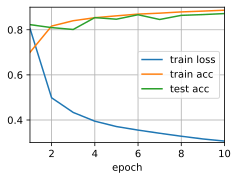

In [53]:
num_epochs, lr = 10, 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              lambda batch_size: d2l.sgd(params, lr, batch_size))